In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
(train_features_1, train_labels_1), (test_features_1, test_labels_1) = cifar10.load_data()

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 13s 0us/step


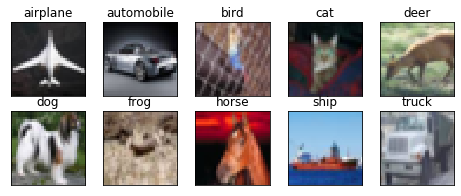

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
from keras.layers import GlobalAveragePooling2D

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Modified network of 6A
### GradCam


Maxpooling is done after every convolution operation after that 1x1 with  GAP is done

In [18]:
# Define the model
model = Sequential()
model.add(Convolution2D(64, 3, 3 ,border_mode='same',input_shape=(32, 32, 3))) #30
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))



model.add(Convolution2D(64, 3, 3)) #28
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(128, 3, 3,border_mode='same')) #14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(128, 3, 3)) #12
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(256, 3, 3,border_mode='same'
                       )) #6
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(256, 3, 3)) #3
model.add(Activation('relu'))
model.add(BatchNormalization())



model.add(Convolution2D(10,1)) #4

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))



# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3))`


In [19]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_27 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 30, 30, 64)       

## Cyclic learning rate

In [0]:
from keras.callbacks import *

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())


In [0]:
clr = CyclicLR(base_lr=0.009, max_lr=0.09,step_size=2000., mode='triangular2')
#model.fit(X_train, Y_train, callbacks=[clr])

Epoch 1/30
  3/390 [..............................] - ETA: 21s - loss: 0.1899 - acc: 0.9349

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<__main__..., steps_per_epoch=390, epochs=30)`
  if sys.path[0] == '':


390/390 [==============================] - 17s 44ms/step - loss: 0.2294 - acc: 0.9183 - val_loss: 1.1548 - val_acc: 0.7895
Epoch 2/30
390/390 [==============================] - 17s 45ms/step - loss: 0.2523 - acc: 0.9108 - val_loss: 0.9433 - val_acc: 0.8029
Epoch 3/30
390/390 [==============================] - 17s 45ms/step - loss: 0.2949 - acc: 0.8957 - val_loss: 0.7334 - val_acc: 0.7884
Epoch 4/30
390/390 [==============================] - 17s 45ms/step - loss: 0.3546 - acc: 0.8769 - val_loss: 0.6965 - val_acc: 0.7966
Epoch 5/30
390/390 [==============================] - 18s 45ms/step - loss: 0.3922 - acc: 0.8649 - val_loss: 0.6958 - val_acc: 0.8006
Epoch 6/30
390/390 [==============================] - 18s 45ms/step - loss: 0.3790 - acc: 0.8715 - val_loss: 0.6370 - val_acc: 0.8105
Epoch 7/30
390/390 [==============================] - 18s 45ms/step - loss: 0.3061 - acc: 0.8940 - val_loss: 0.6086 - val_acc: 0.8177
Epoch 8/30
390/390 [==============================] - 17s 45ms/step - los

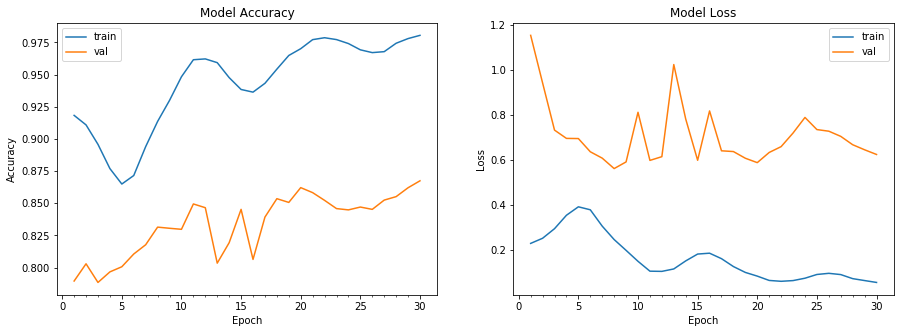

Accuracy on test data is: 86.74


In [54]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 30, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks=[clr])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# trained for 10 epochs before

In [21]:
!ls

sample_data


In [0]:
34,64,84,136

In [0]:
from matplotlib import pyplot as plt
import cv2

### Image1

4


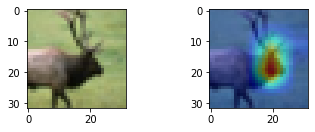

In [199]:
model = model

x = train_features_1[34]
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
x = x.astype('float32')/255
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
print(class_idx)

last_conv_layer = model.get_layer("conv2d_35")
grads = K.gradients(class_output, last_conv_layer.output)[0]
layer_out_channels = last_conv_layer.output_shape[-1]
#print(layer_out_channels)


pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = train_features_1[34]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
superimposed_img_output = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(superimposed_img_output)



### Image2

1


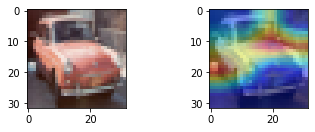

In [200]:
model = model

x = train_features_1[64]
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
x = x.astype('float32')/255
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
print(class_idx)

last_conv_layer = model.get_layer("conv2d_35")
grads = K.gradients(class_output, last_conv_layer.output)[0]
layer_out_channels = last_conv_layer.output_shape[-1]
#print(layer_out_channels)


pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = train_features_1[64]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
superimposed_img_output = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(superimposed_img_output)



### Image3

7


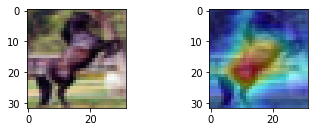

In [201]:
model = model

x = train_features_1[84]
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
x = x.astype('float32')/255
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
print(class_idx)

last_conv_layer = model.get_layer("conv2d_35")
grads = K.gradients(class_output, last_conv_layer.output)[0]
layer_out_channels = last_conv_layer.output_shape[-1]
#print(layer_out_channels)


pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = train_features_1[84]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
superimposed_img_output = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(superimposed_img_output)



### Image4

1


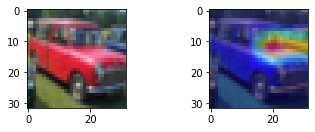

In [203]:
model = model

x = train_features_1[136]
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
x = x.astype('float32')/255
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
print(class_idx)

last_conv_layer = model.get_layer("conv2d_35")
grads = K.gradients(class_output, last_conv_layer.output)[0]
layer_out_channels = last_conv_layer.output_shape[-1]
#print(layer_out_channels)


pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = train_features_1[136]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
superimposed_img_output = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(superimposed_img_output)



# Cutout

In [204]:
# Define the model
model = Sequential()
model.add(Convolution2D(64, 3, 3 ,border_mode='same',input_shape=(32, 32, 3))) #30
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))



model.add(Convolution2D(64, 3, 3)) #28
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(128, 3, 3,border_mode='same')) #14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(128, 3, 3)) #12
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(256, 3, 3,border_mode='same'
                       )) #6
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(256, 3, 3)) #3
model.add(Activation('relu'))
model.add(BatchNormalization())



model.add(Convolution2D(10,1)) #4

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))



# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3))`


In [205]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_33 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_26 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_34 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 30, 30, 64)       

In [0]:
def get_cutout_eraser(proba=1.0, s_l=0.04, s_h=0.06, r_1=0.35, r_2=1 / 0.35,
                      max_erasures_per_image=1, pixel_level=True):
    """
    :param p:
    :param s_l: Minimum Area Proportion of Original that may be cut
    :param s_h: Maximum Area Proportion of Original that may be cut
    :param r_1: Min Aspect Ratio
    :param r_2: Max Aspect Ratio
    :param max_erasures_per_image:
    :param pixel_level:
    :return: Eraser to be used as Preprocessing Function
    """
    assert max_erasures_per_image >= 1

    def eraser(input_img):
        p_1 = np.random.rand()
        if p_1 > proba:
            return input_img
        img_h, img_w, img_c = input_img.shape
        shape = input_img.shape

        v_l = np.min(input_img)
        v_h = np.max(input_img)

        #         mx = np.random.randint(1, max_erasures_per_image + 1)
        mx = max_erasures_per_image
        for i in range(mx):
            while True:
                s = np.random.uniform(s_l, s_h) * img_h * img_w
                r = np.random.uniform(r_1, r_2)
                w = int(np.sqrt(s / r))
                h = int(np.sqrt(s * r))
                left = np.random.randint(0, img_w)
                top = np.random.randint(0, img_h)

                if left + w <= img_w and top + h <= img_h:
                    break

            if pixel_level:
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
            else:
                c = np.random.uniform(v_l, v_h)

            input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<__main__..., steps_per_epoch=390, epochs=30)`
  del sys.path[0]


Epoch 1/30
  5/390 [..............................] - ETA: 2:06 - loss: 4.2259 - acc: 0.1328

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.181453). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


390/390 [==============================] - 19s 48ms/step - loss: 1.6526 - acc: 0.4071 - val_loss: 1.8016 - val_acc: 0.4067
Epoch 2/30
390/390 [==============================] - 17s 43ms/step - loss: 1.1486 - acc: 0.5888 - val_loss: 1.0459 - val_acc: 0.6515
Epoch 3/30
390/390 [==============================] - 17s 44ms/step - loss: 0.9304 - acc: 0.6716 - val_loss: 0.8457 - val_acc: 0.7188
Epoch 4/30
390/390 [==============================] - 17s 44ms/step - loss: 0.8218 - acc: 0.7126 - val_loss: 0.7839 - val_acc: 0.7359
Epoch 5/30
390/390 [==============================] - 17s 44ms/step - loss: 0.7580 - acc: 0.7349 - val_loss: 0.8163 - val_acc: 0.7471
Epoch 6/30
390/390 [==============================] - 17s 44ms/step - loss: 0.7075 - acc: 0.7535 - val_loss: 0.8151 - val_acc: 0.7320
Epoch 7/30
390/390 [==============================] - 17s 44ms/step - loss: 0.6605 - acc: 0.7705 - val_loss: 0.6981 - val_acc: 0.7799
Epoch 8/30
390/390 [==============================] - 17s 44ms/step - los

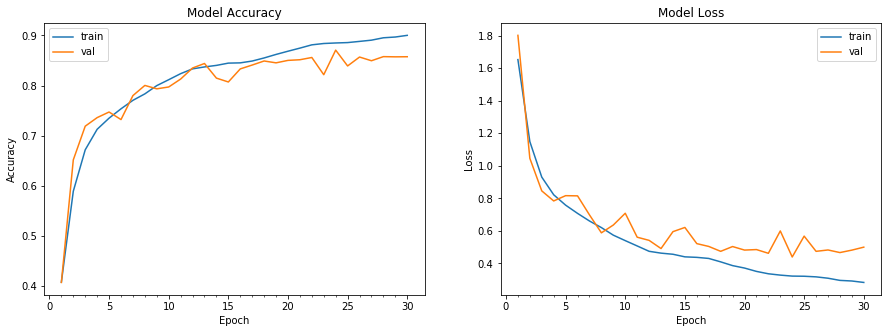

Accuracy on test data is: 85.75


In [210]:
from keras.preprocessing.image import ImageDataGenerator
#from random_eraser import get_random_eraser 

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,preprocessing_function=get_cutout_eraser(s_l=0.05, s_h=0.2, r_1=0.3))


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 30, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks=[clr])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [211]:
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 10, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks=[clr])

Epoch 1/10
  3/390 [..............................] - ETA: 23s - loss: 0.2100 - acc: 0.9271

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<__main__..., steps_per_epoch=390, epochs=10)`
  This is separate from the ipykernel package so we can avoid doing imports until


390/390 [==============================] - 17s 44ms/step - loss: 0.2692 - acc: 0.9040 - val_loss: 0.5155 - val_acc: 0.8544
Epoch 2/10
390/390 [==============================] - 17s 44ms/step - loss: 0.2627 - acc: 0.9077 - val_loss: 0.4451 - val_acc: 0.8688
Epoch 3/10
390/390 [==============================] - 17s 44ms/step - loss: 0.2539 - acc: 0.9097 - val_loss: 0.4416 - val_acc: 0.8652
Epoch 4/10
390/390 [==============================] - 17s 44ms/step - loss: 0.2491 - acc: 0.9117 - val_loss: 0.4667 - val_acc: 0.8564
Epoch 5/10
390/390 [==============================] - 17s 44ms/step - loss: 0.2458 - acc: 0.9134 - val_loss: 0.4716 - val_acc: 0.8653
Epoch 6/10
390/390 [==============================] - 17s 44ms/step - loss: 0.2466 - acc: 0.9127 - val_loss: 0.4757 - val_acc: 0.8682
Epoch 7/10
390/390 [==============================] - 17s 44ms/step - loss: 0.2477 - acc: 0.9123 - val_loss: 0.4849 - val_acc: 0.8553
Epoch 8/10
390/390 [==============================] - 17s 44ms/step - los

### Image 1


4


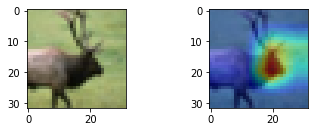

In [213]:
model = model

x = train_features_1[34]
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
x = x.astype('float32')/255
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
print(class_idx)

last_conv_layer = model.get_layer("conv2d_42")
grads = K.gradients(class_output, last_conv_layer.output)[0]
layer_out_channels = last_conv_layer.output_shape[-1]
#print(layer_out_channels)


pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = train_features_1[34]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
superimposed_img_output = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(superimposed_img_output)



### Image 2

1


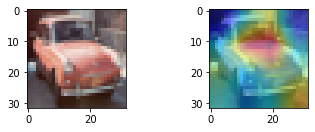

In [215]:
model = model

x = train_features_1[64]
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
x = x.astype('float32')/255
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
print(class_idx)

last_conv_layer = model.get_layer("conv2d_42")
grads = K.gradients(class_output, last_conv_layer.output)[0]
layer_out_channels = last_conv_layer.output_shape[-1]
#print(layer_out_channels)


pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = train_features_1[64]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
superimposed_img_output = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(superimposed_img_output)



### Image 3

7


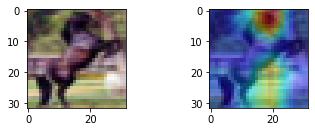

In [216]:
model = model

x = train_features_1[84]
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
x = x.astype('float32')/255
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
print(class_idx)

last_conv_layer = model.get_layer("conv2d_42")
grads = K.gradients(class_output, last_conv_layer.output)[0]
layer_out_channels = last_conv_layer.output_shape[-1]
#print(layer_out_channels)


pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = train_features_1[84]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
superimposed_img_output = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(superimposed_img_output)



### Image 4

1


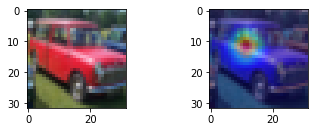

In [217]:
model = model

x = train_features_1[136]
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
x = x.astype('float32')/255
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
print(class_idx)

last_conv_layer = model.get_layer("conv2d_42")
grads = K.gradients(class_output, last_conv_layer.output)[0]
layer_out_channels = last_conv_layer.output_shape[-1]
#print(layer_out_channels)


pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = train_features_1[136]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
superimposed_img_output = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(superimposed_img_output)

